In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

print("="*70)
print("GIAI ĐOẠN 2: TRÍCH XUẤT ĐẶC TRƯNG TF-IDF")
print("="*70)

# Đọc dữ liệu đã làm sạch
df = pd.read_csv('../../data_use/bbc_cleaned.csv')
print(f"\nSố lượng văn bản: {len(df)}")
print(f"Các nhãn: {df['labels'].unique()}")

# Chuẩn bị dữ liệu
X = df['cleaned_text']
y = df['labels']

# Chia tập train-test (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nKích thước tập train: {len(X_train)}")
print(f"Kích thước tập test: {len(X_test)}")
print(f"\nPhân bố nhãn trong tập train:")
print(y_train.value_counts())

# Khởi tạo TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Giới hạn 5000 đặc trưng
    min_df=2,           # Từ phải xuất hiện ít nhất 2 văn bản
    max_df=0.8,         # Từ không xuất hiện quá 80% văn bản
    ngram_range=(1, 2), # Unigram và bigram
    sublinear_tf=True   # Áp dụng scaling logarit
)

print("\n" + "="*70)
print("Đang thực hiện TF-IDF transformation...")
print("="*70)

# Fit trên tập train và transform cả train và test
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Lấy tên các features
feature_names = tfidf_vectorizer.get_feature_names_out()

print("\n" + "="*70)
print("THÔNG TIN MA TRẬN ĐẶC TRƯNG TF-IDF")
print("="*70)

print(f"\nKích thước ma trận TF-IDF:")
print(f"   ├─ Tập train: {X_train_tfidf.shape}")
print(f"   │  └─ ({X_train_tfidf.shape[0]} văn bản × {X_train_tfidf.shape[1]} đặc trưng)")
print(f"   └─ Tập test: {X_test_tfidf.shape}")
print(f"      └─ ({X_test_tfidf.shape[0]} văn bản × {X_test_tfidf.shape[1]} đặc trưng)")

print(f"\nSố lượng đặc trưng (features): {len(feature_names)}")
print(f"   └─ Tương ứng với {len(feature_names)} từ/cụm từ khác nhau")

print(f"\nKích thước bộ nhớ:")
print(f"   ├─ Train TF-IDF: {X_train_tfidf.data.nbytes / 1024 / 1024:.2f} MB")
print(f"   └─ Test TF-IDF: {X_test_tfidf.data.nbytes / 1024 / 1024:.2f} MB")

print(f"\nĐộ thưa (Sparsity):")
sparsity_train = 100 * (1 - X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1]))
sparsity_test = 100 * (1 - X_test_tfidf.nnz / (X_test_tfidf.shape[0] * X_test_tfidf.shape[1]))
print(f"   ├─ Train: {sparsity_train:.2f}% (chỉ {100-sparsity_train:.2f}% có giá trị khác 0)")
print(f"   └─ Test: {sparsity_test:.2f}% (chỉ {100-sparsity_test:.2f}% có giá trị khác 0)")

print(f"\nVocabulary size: {len(tfidf_vectorizer.vocabulary_)}")

# Hiển thị top features theo TF-IDF score
print("\n" + "="*70)
print("TOP 30 ĐẶC TRƯNG QUAN TRỌNG NHẤT (theo TF-IDF trung bình)")
print("="*70)

# Tính TF-IDF trung bình cho mỗi feature
tfidf_mean = np.asarray(X_train_tfidf.mean(axis=0)).flatten()
top_indices = tfidf_mean.argsort()[-30:][::-1]

print("\nRank | Feature | TF-IDF Score")
print("-" * 45)
for rank, idx in enumerate(top_indices, 1):
    print(f"{rank:4d} | {feature_names[idx]:25s} | {tfidf_mean[idx]:.6f}")

# Phân tích top features theo từng nhãn
print("\n" + "="*70)
print("TOP 10 ĐẶC TRƯNG THEO TỪNG NHÃN")
print("="*70)

for label in sorted(y_train.unique()):
    label_indices = y_train[y_train == label].index
    label_train_indices = [i for i, idx in enumerate(X_train.index) if idx in label_indices]
    
    # TF-IDF trung bình cho nhãn này
    label_tfidf_mean = np.asarray(X_train_tfidf[label_train_indices].mean(axis=0)).flatten()
    top_label_indices = label_tfidf_mean.argsort()[-10:][::-1]
    
    print(f"\n{label.upper()}:")
    print("   ", ", ".join([feature_names[i] for i in top_label_indices]))



GIAI ĐOẠN 2: TRÍCH XUẤT ĐẶC TRƯNG TF-IDF

Số lượng văn bản: 2218
Các nhãn: ['business' 'entertainment' 'politics' 'sport' 'tech']

Kích thước tập train: 1774
Kích thước tập test: 444

Phân bố nhãn trong tập train:
labels
sport            409
business         408
politics         331
tech             320
entertainment    306
Name: count, dtype: int64

Đang thực hiện TF-IDF transformation...

Đang thực hiện TF-IDF transformation...

THÔNG TIN MA TRẬN ĐẶC TRƯNG TF-IDF

Kích thước ma trận TF-IDF:
   ├─ Tập train: (1774, 5000)
   │  └─ (1774 văn bản × 5000 đặc trưng)
   └─ Tập test: (444, 5000)
      └─ (444 văn bản × 5000 đặc trưng)

Số lượng đặc trưng (features): 5000
   └─ Tương ứng với 5000 từ/cụm từ khác nhau

Kích thước bộ nhớ:
   ├─ Train TF-IDF: 1.72 MB
   └─ Test TF-IDF: 0.42 MB

Độ thưa (Sparsity):
   ├─ Train: 97.46% (chỉ 2.54% có giá trị khác 0)
   └─ Test: 97.50% (chỉ 2.50% có giá trị khác 0)

Vocabulary size: 5000

TOP 30 ĐẶC TRƯNG QUAN TRỌNG NHẤT (theo TF-IDF trung bình)

Ran

In [16]:
# Lưu ma trận TF-IDF dạng sparse
from scipy import sparse
sparse.save_npz('../../data_use/tf_idf/X_train_tfidf.npz', X_train_tfidf)
sparse.save_npz('../../data_use/tf_idf/X_test_tfidf.npz', X_test_tfidf)

# Lưu labels
np.save('../../data_use/tf_idf/y_train.npy', y_train.values)
np.save('../../data_use/tf_idf/y_test.npy', y_test.values)

# Lưu feature names và vectorizer
import pickle
with open('../../data_use/tf_idf/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
    
with open('../../data_use/tf_idf/feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

print("\nĐã lưu các file:")
print("   ├─ ../../data_use/tf_idf/X_train_tfidf.npz (ma trận TF-IDF train)")
print("   ├─ ../../data_use/tf_idf/X_test_tfidf.npz (ma trận TF-IDF test)")
print("   ├─ ../../data_use/tf_idf/y_train.npy (labels train)")
print("   ├─ ../../data_use/tf_idf/y_test.npy (labels test)")
print("   ├─ ../../data_use/tf_idf/tfidf_vectorizer.pkl (vectorizer để transform dữ liệu mới)")
print("   └─ ../../data_use/tf_idf/feature_names.pkl (tên các đặc trưng)")



Đã lưu các file:
   ├─ ../../data_use/tf_idf/X_train_tfidf.npz (ma trận TF-IDF train)
   ├─ ../../data_use/tf_idf/X_test_tfidf.npz (ma trận TF-IDF test)
   ├─ ../../data_use/tf_idf/y_train.npy (labels train)
   ├─ ../../data_use/tf_idf/y_test.npy (labels test)
   ├─ ../../data_use/tf_idf/tfidf_vectorizer.pkl (vectorizer để transform dữ liệu mới)
   └─ ../../data_use/tf_idf/feature_names.pkl (tên các đặc trưng)


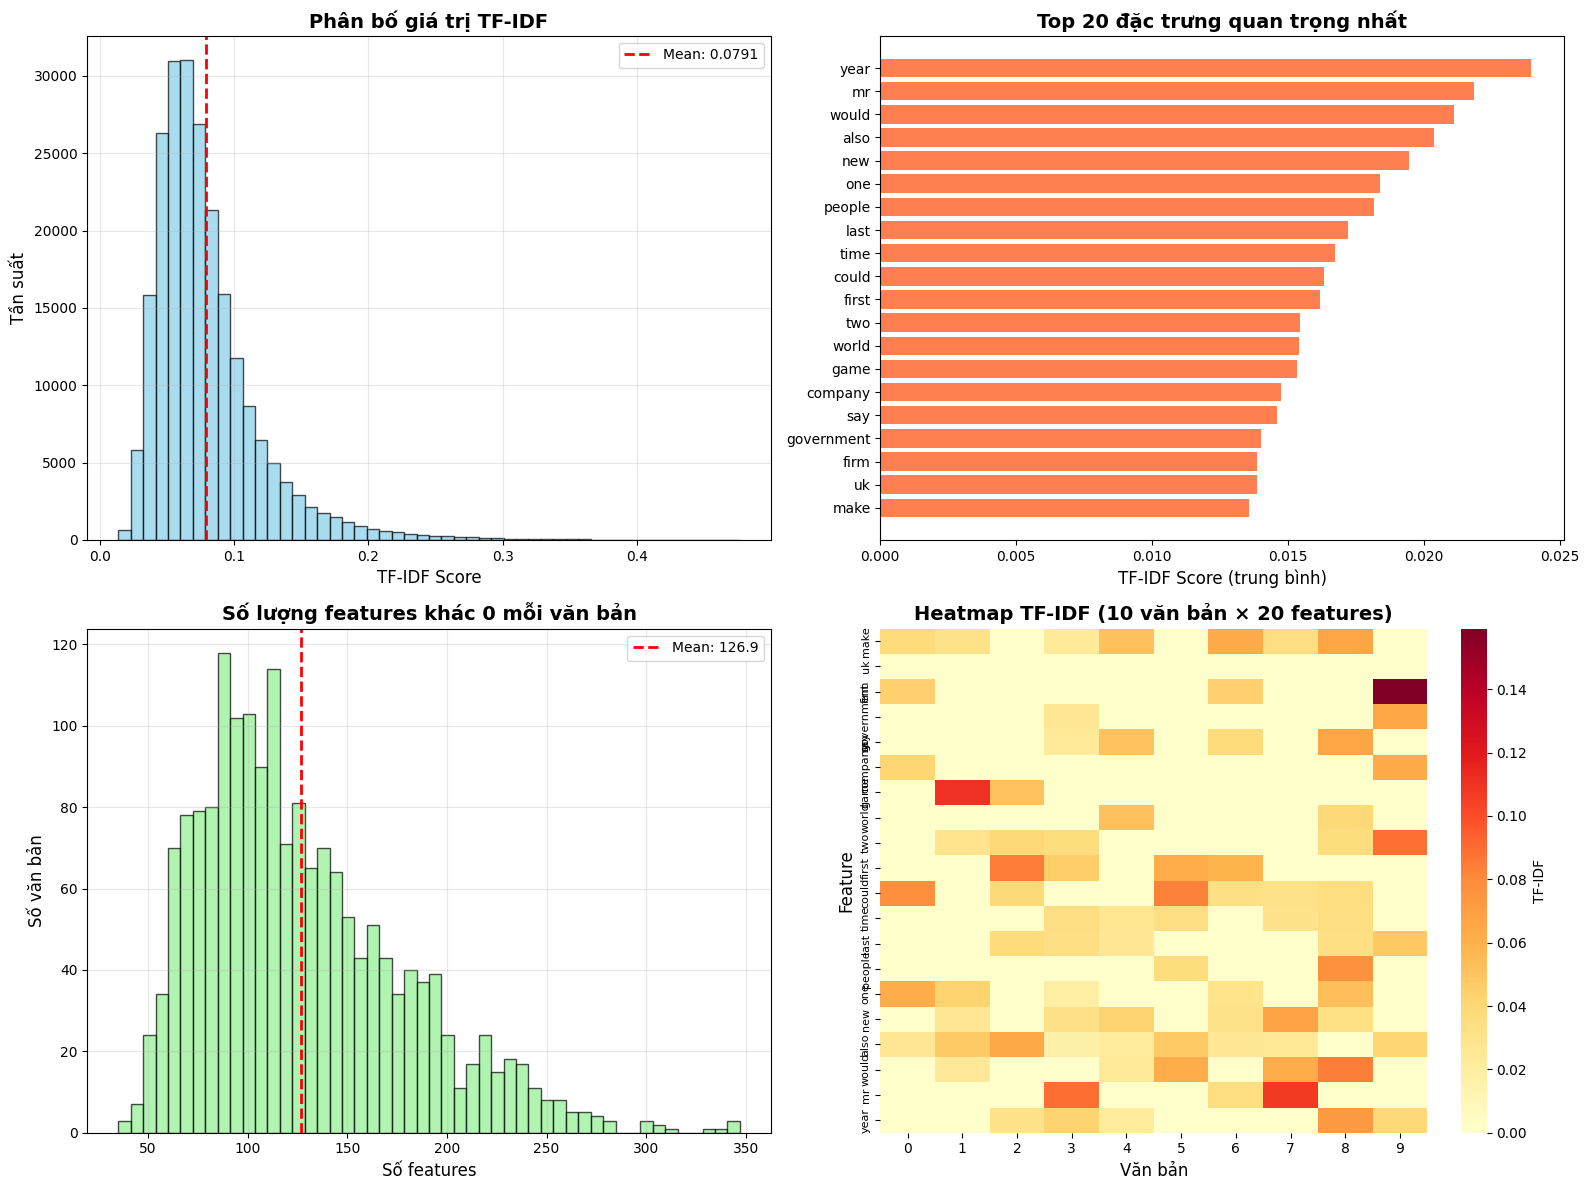

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Phân bố giá trị TF-IDF
ax1 = axes[0, 0]
tfidf_values = X_train_tfidf.data
ax1.hist(tfidf_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_title('Phân bố giá trị TF-IDF', fontsize=14, fontweight='bold')
ax1.set_xlabel('TF-IDF Score', fontsize=12)
ax1.set_ylabel('Tần suất', fontsize=12)
ax1.axvline(tfidf_values.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {tfidf_values.mean():.4f}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Top 20 features
ax2 = axes[0, 1]
top_20_indices = tfidf_mean.argsort()[-20:]
top_20_features = [feature_names[i] for i in top_20_indices]
top_20_scores = [tfidf_mean[i] for i in top_20_indices]
ax2.barh(top_20_features, top_20_scores, color='coral')
ax2.set_title('Top 20 đặc trưng quan trọng nhất', fontsize=14, fontweight='bold')
ax2.set_xlabel('TF-IDF Score (trung bình)', fontsize=12)

# 3. Số lượng features khác 0 mỗi văn bản
ax3 = axes[1, 0]
nnz_per_doc = np.diff(X_train_tfidf.indptr)
ax3.hist(nnz_per_doc, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
ax3.set_title('Số lượng features khác 0 mỗi văn bản', fontsize=14, fontweight='bold')
ax3.set_xlabel('Số features', fontsize=12)
ax3.set_ylabel('Số văn bản', fontsize=12)
ax3.axvline(nnz_per_doc.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {nnz_per_doc.mean():.1f}')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Heatmap TF-IDF mẫu (10 văn bản đầu, 20 features hàng đầu)
ax4 = axes[1, 1]
sample_tfidf = X_train_tfidf[:10, top_20_indices].toarray()
sns.heatmap(sample_tfidf.T, cmap='YlOrRd', ax=ax4, cbar_kws={'label': 'TF-IDF'})
ax4.set_title('Heatmap TF-IDF (10 văn bản × 20 features)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Văn bản', fontsize=12)
ax4.set_ylabel('Feature', fontsize=12)
ax4.set_yticklabels(top_20_features, fontsize=8)

plt.tight_layout()
plt.savefig('img/tfidf_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# Lấy vector TF-IDF của văn bản đầu tiên
row = X_train_tfidf[0].toarray().flatten()

# Lấy top 10 feature có giá trị cao nhất
top_indices = row.argsort()[-10:][::-1]
top_features = [(feature_names[i], row[i]) for i in top_indices if row[i] > 0]

print("Top TF-IDF features for the first document:")
for word, score in top_features:
    print(f"{word:<20} {score:.4f}")


Top TF-IDF features for the first document:
flaw                 0.3083
fix                  0.2307
critical             0.2170
hole                 0.2127
patch                0.2103
microsoft            0.1931
program              0.1890
ie                   0.1802
virus                0.1694
security             0.1638
